# Combating Social Media Addiction with Data-Driven Insights

This is a notebook to analyze how social media platforms that have become integral to our daily lives, especially for students can impact mental health, sleep, productivity, and overall well-being if it's overused.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and initial Exploratory Analysis

In [3]:
# Loading the dataset
df = pd.read_csv('Students Social Media Addiction (1).csv')
print(df.info())
df.head()

# Checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

## Adding meaningful new columns

In [10]:
#Adding New Colums - Age Groups

df['Age Group'] = pd.cut(
    df['Age'],
    bins = [18, 20, 22, 24, 26, 28],
    labels = ["18 - 20", "21 - 22", "23 - 24", "25 - 26", "27 - 28"],
    include_lowest = True
)

#Risk Levels as per daily usage

def classify_risk(hours):
    if pd.isna(hours):
        return "Unknown"
    if hours < 2:
        return "Low Risk"
    elif hours < 5:
        return "Moderate Risk"
    else:
        return "High Risk"

df['risk_level'] = df['Avg_Daily_Usage_Hours'].apply(classify_risk)

#Addiction category

def addiction_category(s):
    if s >= 8:
        return "Severe"
    if s >= 6:
        return "High"
    if s >= 4:
        return "Moderate"
    return "Low"

df["addiction_category"] = df["Avg_Daily_Usage_Hours"].apply(addiction_category)

#Displaying the first few columns after adding new columns
df.head(10)
    


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Age Group,risk_level,addiction_category
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,18 - 20,High Risk,Moderate
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,21 - 22,Moderate Risk,Low
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,18 - 20,High Risk,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,18 - 20,Moderate Risk,Low
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,21 - 22,Moderate Risk,Moderate
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9,18 - 20,High Risk,High
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2,23 - 24,Low Risk,Low
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8,18 - 20,High Risk,Moderate
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5,18 - 20,Moderate Risk,Moderate
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4,21 - 22,Moderate Risk,Low


## Exploratory Data Analysis (EDA)

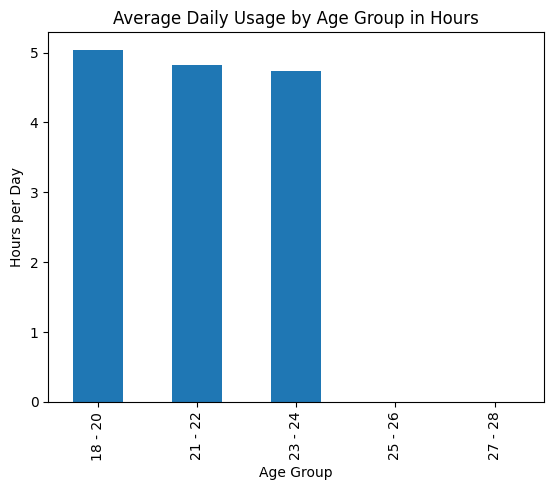

In [10]:
# Bar Chart for usage by different Age Group
grp = df.groupby("Age Group", observed = False)["Avg_Daily_Usage_Hours"].mean()
grp.plot(kind = "bar", title = "Average Daily Usage by Age Group in Hours")
plt.ylabel("Hours per Day")
plt.show()


- The Chart highlights that the Teens (18 years to 20 years) and Young Adults (21 years to 24 years) are the highest users of Social Media, with the age group of 16 to 20 years the highest usage per day, suggesting Youths having the most of the screen times.

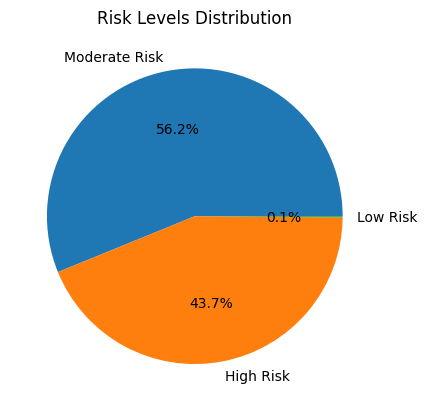

In [11]:
# Pie Chart for Risk Levels
df["risk_level"].value_counts().plot(kind = "pie", title = "Risk Levels Distribution", autopct = "%1.1f%%")
plt.ylabel("")
plt.show()

- The Pie Chart highlights that most people fall into **Moderate Risk (56.2%)** and **High Risk (43.7%)** Categories and almost next to none falls in Low Risk Category. It suggests that overall risks are concerning and very few students maintain a Low Risk Profile.

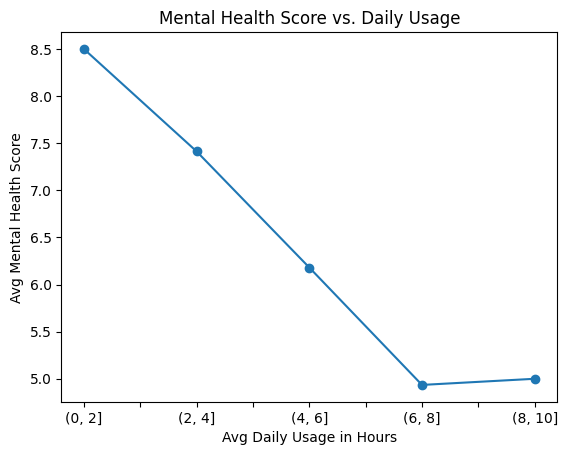

In [12]:
# Line Chart to see how usage is affecting Mental Health
df["usage"] = pd.cut(df["Avg_Daily_Usage_Hours"], bins = [0, 2, 4, 6, 8, 10, 12])
trend = df.groupby("usage", observed = False)["Mental_Health_Score"].mean()
trend.plot(kind = "line", marker = "o", title = "Mental Health Score vs. Daily Usage")
plt.ylabel("Avg Mental Health Score")
plt.xlabel("Avg Daily Usage in Hours")
plt.show()

- The chart shows that **higher daily usage is linked with lower mental health score.** People using Social Media for **0 to 2 hours** a day report the **best** mental health score, while those who cross the **6 hours** usage, a **sharp drop** in mental health scor is **observed**. However it is interesting to point it out that **after 8 hours of usage the decline slows down.**

In [13]:
# Heatmap to see if there is a correlation between different variables
num_cols = ["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Mental_Health_Score","Addicted_Score","Conflicts_Over_Social_Media"]
corr = df[num_cols].corr()
corr.style.background_gradient(cmap = "coolwarm")

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score,Conflicts_Over_Social_Media
Avg_Daily_Usage_Hours,1.000000,-0.790582,-0.801058,0.832000,0.804582
Sleep_Hours_Per_Night,-0.790582,1.000000,0.707439,-0.764858,-0.677266
Mental_Health_Score,-0.801058,0.707439,1.000000,-0.945051,-0.893572
Addicted_Score,0.832000,-0.764858,-0.945051,1.000000,0.933586
Conflicts_Over_Social_Media,0.804582,-0.677266,-0.893572,0.933586,1.000000


- The heatmap suggests that **higher average daily usage is strongly linked with less sleep and poorer mental health condition**.
The addiction scores are highly correlated with conflicts, **suggesting real world social issues**.
Since mental health and sleep are correlated, **encouraging healthy sleep could improve mental health**.

risk_level
High Risk        6.081494
Moderate Risk    4.022980
Low Risk         1.500000
Name: Avg_Daily_Usage_Hours, dtype: float64 



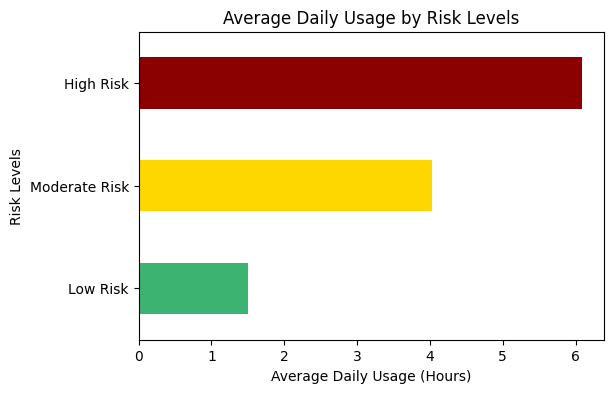

In [32]:
risk_level_chart = df.groupby('risk_level')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False)
print(risk_level_chart,"\n")

# Plotting a Horizontal Bar Chart
risk_level_chart.plot(kind = 'barh', figsize = (6, 4), color = ['darkred', 'gold', 'mediumseagreen'])
plt.title('Average Daily Usage by Risk Levels')
plt.ylabel('Risk Levels')
plt.xlabel('Average Daily Usage (Hours)')
plt.gca().invert_yaxis() # Invert Y-axis to show High Risk Levels at the top
plt.show()

- As per the analysis it is clear that the students who fall under the **High Risk** category has a daily average usage of **6 Hours.**<br>
- Students falling under **Moderate Risk** category has a daily average usage of **4 Hours**
- While students who are at **Low Risk** spend **1.5 Hours** daily on Social Media.

Average Daily Usage by Gender
Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64 

Average Daily Usage by Age Groups
Age Group
18 - 20    5.039474
21 - 22    4.817492
23 - 24    4.741667
25 - 26         NaN
27 - 28         NaN
Name: Avg_Daily_Usage_Hours, dtype: float64 

Average Daily Usage by Education Levels
Academic_Level
Graduate         4.776923
High School      5.544444
Undergraduate    5.001416
Name: Avg_Daily_Usage_Hours, dtype: float64 

Addiction Scores By Platform
Most_Used_Platform
WhatsApp     6.475926
TikTok       5.346104
Snapchat     5.092308
WeChat       4.960000
Instagram    4.872289
Twitter      4.870000
KakaoTalk    4.725000
Facebook     4.507317
VKontakte    4.250000
YouTube      4.080000
LINE         3.250000
LinkedIn     2.519048
Name: Avg_Daily_Usage_Hours, dtype: float64 

Average Daily Usage by Risk Levels
risk_level
High Risk        6.081494
Low Risk         1.500000
Moderate Risk    4.022980
Name: Avg_Daily_Usage_Hours,

C:\Users\Win11\AppData\Local\Temp\ipykernel_14512\442598130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age Group')['Avg_Daily_Usage_Hours'].mean(), "\n")


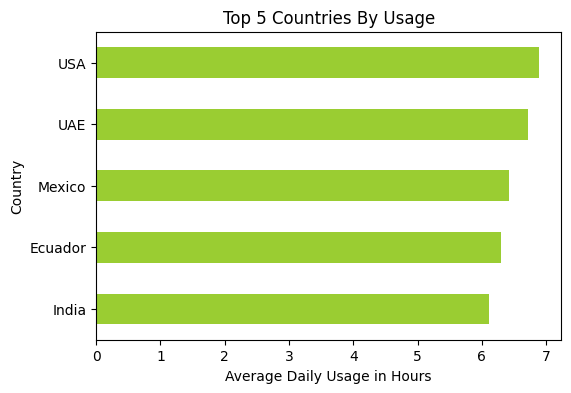

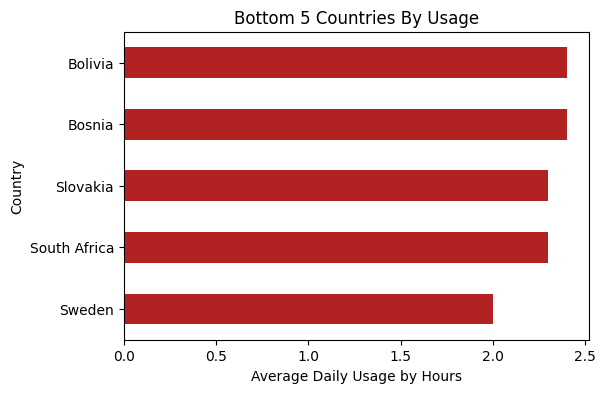

In [ ]:
print("Average Daily Usage by Gender")
print(df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean(), "\n")

print("Average Daily Usage by Age Groups")
print(df.groupby('Age Group')['Avg_Daily_Usage_Hours'].mean(), "\n") 

print("Average Daily Usage by Education Levels")
print(df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean(), "\n")

print("Addiction Scores By Platform")
sorted_usage = df.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False)
print(sorted_usage, "\n")

# Top 5 Countries by Average Daily Usage
country_usage = df.groupby('Country')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False)
top_5 = country_usage.head(5).iloc[::-1] #Reversing the order

# Plotting the Chart for Top 5 Countries
top_5.plot(kind = 'barh', figsize = (6,4), color = "yellowgreen")
plt.title("Top 5 Countries By Usage")
plt.xlabel("Average Daily Usage in Hours")
plt.ylabel("Country")
plt.show()



# Bottom 5 Countries by Daily Average Usage
bott_coun_usage = df.groupby('Country')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False)
bott_5 = bott_coun_usage.tail(5).iloc[::-1] #Reversing the order

# Plotting the Chart for Bottom 5 Countries 
bott_5.plot(kind = 'barh', figsize = (6,4), color = "firebrick")
plt.title("Bottom 5 Countries By Usage")
plt.xlabel("Average Daily Usage by Hours")
plt.ylabel("Country")
plt.show()


- The Social Media Usage between the Genders is almost the same with **Male Users having slightly more engagement** than the Female Users.<br>
- In the Age Group of **18 to 20 years** highest average daily usage is observed and the further we go up the age groups the average usage tends to decline slowly.<br>
- While analyzing the usage of the students based on the Education Levels **High School Students** emergerged as the highest users among all. This can be further linked to the 18 to 20 years age group as the higest daily average users.<br>
- **Whatsapp, TikTok and Snapchat** are the Top 3 Social Media Platforms that has the highest engagement in the respective order, with **Whatsapp** averaging at around **6.5 Hours** of daily average usage.
- Students from **USA** are spending the most time on Social Media at about close to **7 Hours** of average daily usage which is the highest while students from **Sweden** spending the least amount of time on Social Media at about **2 Hours** of daily average usage.


Affects_Academic_Performance
No     3.804365
Yes    5.538631
Name: Avg_Daily_Usage_Hours, dtype: float64


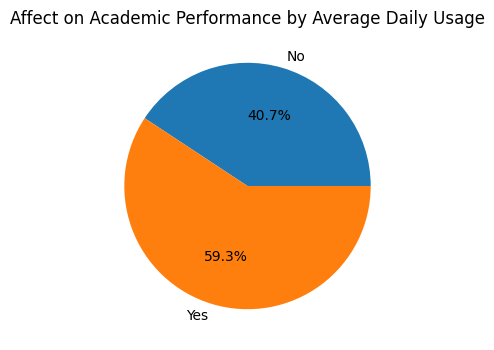

In [19]:
# Grouping with respect to affect on Academic Performance
affect = df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean()
print(affect)

# Plotting a Pie Chart

plt.figure(figsize = (6, 4))
plt.pie(affect, labels = affect.index, autopct = '%1.1f%%')
plt.title("Affect on Academic Performance by Average Daily Usage")
plt.show()

- It is clear the excessive use of Social Media **Negetively** affects mojority of the student's academic performance with **59.3%**.<br>
While **40.7%** of the students feels that Social Media doen not affects their acdemic performance.

Average Daily Usage by Relationship Status
Relationship_Status
Complicated        4.721875
In Relationship    4.930796
Single             4.926042
Name: Avg_Daily_Usage_Hours, dtype: float64 



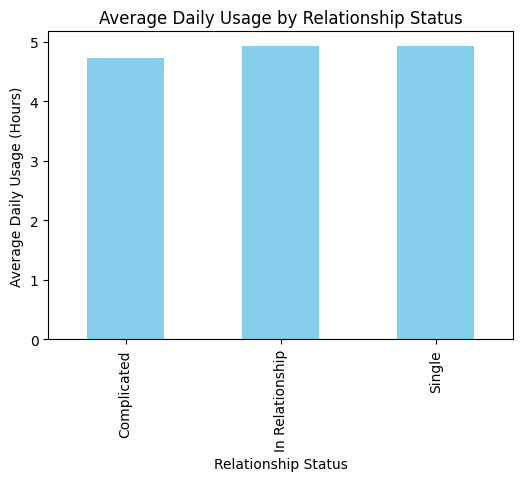

In [50]:
# Grouping with respect to relationship status
print("Average Daily Usage by Relationship Status")
relation_status = df.groupby('Relationship_Status')["Avg_Daily_Usage_Hours"].mean()
print(relation_status, "\n")

# Plotting the Chart
relation_status.plot(kind = 'bar', figsize = (6, 4), color = "skyblue")
plt.title("Average Daily Usage by Relationship Status")
plt.xlabel("Relationship Status")
plt.ylabel("Average Daily Usage (Hours)")
plt.show()

- All the students have almost equal engagement in Social Media suggesting **NO IMPACT** with regards to their Relationship Status. Almost everyone spends roughly **5 Hours** daily on various Social Media Platforms.

In [16]:
# Defining a Function for Detox Strategy

def detox_strategy(risk_level):
    advice = []
    if risk_level == "High Risk":
        advice.append("Avoid using phones before bed.")
        advice.append("Engage in Offline Activities like reading or excercising.")
    elif risk_level == "Moderate Risk":
        advice.append("Set daily limits on Social Media usage to 30 minutes")
    else:
        advice.append("Maintain Healthy Digital Habits")
    return " | ".join(advice)

pd.set_option('display.max_colwidth', None) # Displaying the full length of the Column

df["Detox_Advice"] = df['risk_level'].apply(detox_strategy)
df[["Student_ID", "Avg_Daily_Usage_Hours", "risk_level", "Detox_Advice"]].head(10)

,Student_ID,Avg_Daily_Usage_Hours,risk_level,Detox_Advice
0,1,5.2,High Risk,Avoid using phones before bed. | Engage in Offline Activities like reading or excercising.
1,2,2.1,Moderate Risk,Set daily limits on Social Media usage to 30 minutes
2,3,6.0,High Risk,Avoid using phones before bed. | Engage in Offline Activities like reading or excercising.
3,4,3.0,Moderate Risk,Set daily limits on Social Media usage to 30 minutes
4,5,4.5,Moderate Risk,Set daily limits on Social Media usage to 30 minutes
5,6,7.2,High Risk,Avoid using phones before bed. | Engage in Offline Activities like reading or excercising.
6,7,1.5,Low Risk,Maintain Healthy Digital Habits
7,8,5.8,High Risk,Avoid using phones before bed. | Engage in Offline Activities like reading or excercising.
8,9,4.0,Moderate Risk,Set daily limits on Social Media usage to 30 minutes
9,10,3.3,Moderate Risk,Set daily limits on Social Media usage to 30 minutes


The analysis reveals that the **Social Media Addiction** is a significant concern for the students across all parameters with almost all falling into Moderate or High Risk categories. The main cause of such addiction is the number of hours spent on various Social Media Platforms that often exceeds 5 Hours daily.<br> The excessive usage does have cosequences. It is found that the **Younger Students** especially those who are in **High School** are the most extensive users of these platforms, hence making them **more vulnerable**.<br>
Our further analysis reveals that excessive usage of these Social Media Platforms is also affecting majority of the students. **59.3%** of the students accept that over usage of Social Media and spending Hours in these platforms are negetively affecting them in their academics. This can make students less productive over time.<br>
We also found a **strong link** between higher addiction scores and the declining mental health. As Social Media usage **increases**, the student's **well-being decreases**.<br>
In order to address this issue, we have recomemned some approaches that students can follow in order for them to get digitally detoxed and improve their well being.